## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.629169  0.176287 -0.922129 -1.285150  0.270688  0.247106
1  1.306716  1.736129 -0.267132  0.544367 -0.704200 -0.345428
2  0.670338  1.733288 -1.139719  0.510878  0.389365  1.198235
3 -0.522616 -1.574446 -1.468209 -1.139358 -0.425202 -1.235930
4 -1.080827  0.030283  0.751698  0.855482 -1.409909 -0.530489


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9434863	total: 68.9ms	remaining: 1m 8s
1:	learn: 0.9351237	total: 69.4ms	remaining: 34.6s
2:	learn: 0.9258695	total: 69.9ms	remaining: 23.2s
3:	learn: 0.9163971	total: 70.7ms	remaining: 17.6s
4:	learn: 0.9077063	total: 71.2ms	remaining: 14.2s
5:	learn: 0.8996281	total: 71.7ms	remaining: 11.9s
6:	learn: 0.8889214	total: 72.4ms	remaining: 10.3s
7:	learn: 0.8805134	total: 72.9ms	remaining: 9.04s
8:	learn: 0.8726560	total: 73.4ms	remaining: 8.08s
9:	learn: 0.8629394	total: 73.9ms	remaining: 7.31s
10:	learn: 0.8536584	total: 74.3ms	remaining: 6.68s
11:	learn: 0.8449366	total: 74.8ms	remaining: 6.16s
12:	learn: 0.8376627	total: 75.3ms	remaining: 5.72s
13:	learn: 0.8300753	total: 75.7ms	remaining: 5.33s
14:	learn: 0.8230574	total: 76.3ms	remaining: 5.01s
15:	learn: 0.8162854	total: 76.9ms	remaining: 4.73s
16:	learn: 0.8091898	total: 77.4ms	remaining: 4.47s
17:	learn: 0.8021442	total: 77.9ms	remaining: 4.25s
18:	learn: 0.7949416	total: 78.6ms	remaining

82:	learn: 0.4636987	total: 109ms	remaining: 1.2s
83:	learn: 0.4598057	total: 109ms	remaining: 1.19s
84:	learn: 0.4561385	total: 110ms	remaining: 1.18s
85:	learn: 0.4533482	total: 110ms	remaining: 1.17s
86:	learn: 0.4495151	total: 111ms	remaining: 1.16s
87:	learn: 0.4460523	total: 111ms	remaining: 1.15s
88:	learn: 0.4423730	total: 112ms	remaining: 1.14s
89:	learn: 0.4386829	total: 112ms	remaining: 1.13s
90:	learn: 0.4354576	total: 113ms	remaining: 1.12s
91:	learn: 0.4319325	total: 113ms	remaining: 1.11s
92:	learn: 0.4285070	total: 113ms	remaining: 1.11s
93:	learn: 0.4255318	total: 114ms	remaining: 1.1s
94:	learn: 0.4216922	total: 115ms	remaining: 1.09s
95:	learn: 0.4180154	total: 115ms	remaining: 1.08s
96:	learn: 0.4145644	total: 115ms	remaining: 1.07s
97:	learn: 0.4119799	total: 116ms	remaining: 1.07s
98:	learn: 0.4086695	total: 116ms	remaining: 1.06s
99:	learn: 0.4059481	total: 117ms	remaining: 1.05s
100:	learn: 0.4031296	total: 117ms	remaining: 1.04s
101:	learn: 0.3999241	total: 118

254:	learn: 0.1550399	total: 187ms	remaining: 546ms
255:	learn: 0.1539493	total: 188ms	remaining: 545ms
256:	learn: 0.1531092	total: 188ms	remaining: 543ms
257:	learn: 0.1522455	total: 188ms	remaining: 542ms
258:	learn: 0.1512386	total: 189ms	remaining: 540ms
259:	learn: 0.1510214	total: 189ms	remaining: 538ms
260:	learn: 0.1504655	total: 190ms	remaining: 537ms
261:	learn: 0.1497861	total: 190ms	remaining: 536ms
262:	learn: 0.1491185	total: 191ms	remaining: 535ms
263:	learn: 0.1481661	total: 191ms	remaining: 533ms
264:	learn: 0.1475460	total: 192ms	remaining: 532ms
265:	learn: 0.1468966	total: 192ms	remaining: 530ms
266:	learn: 0.1458689	total: 193ms	remaining: 528ms
267:	learn: 0.1453184	total: 193ms	remaining: 527ms
268:	learn: 0.1446716	total: 193ms	remaining: 525ms
269:	learn: 0.1436654	total: 194ms	remaining: 524ms
270:	learn: 0.1427711	total: 194ms	remaining: 522ms
271:	learn: 0.1420760	total: 195ms	remaining: 521ms
272:	learn: 0.1413409	total: 195ms	remaining: 520ms
273:	learn: 

480:	learn: 0.0622310	total: 292ms	remaining: 315ms
481:	learn: 0.0618143	total: 292ms	remaining: 314ms
482:	learn: 0.0614153	total: 293ms	remaining: 313ms
483:	learn: 0.0612858	total: 293ms	remaining: 312ms
484:	learn: 0.0609271	total: 293ms	remaining: 312ms
485:	learn: 0.0607324	total: 294ms	remaining: 311ms
486:	learn: 0.0602972	total: 294ms	remaining: 310ms
487:	learn: 0.0599146	total: 295ms	remaining: 309ms
488:	learn: 0.0595433	total: 295ms	remaining: 309ms
489:	learn: 0.0592499	total: 296ms	remaining: 308ms
490:	learn: 0.0590605	total: 296ms	remaining: 307ms
491:	learn: 0.0587745	total: 297ms	remaining: 306ms
492:	learn: 0.0585898	total: 297ms	remaining: 306ms
493:	learn: 0.0583731	total: 297ms	remaining: 305ms
494:	learn: 0.0580162	total: 298ms	remaining: 304ms
495:	learn: 0.0578347	total: 298ms	remaining: 303ms
496:	learn: 0.0575644	total: 299ms	remaining: 302ms
497:	learn: 0.0572438	total: 300ms	remaining: 302ms
498:	learn: 0.0570690	total: 300ms	remaining: 301ms
499:	learn: 

647:	learn: 0.0273885	total: 370ms	remaining: 201ms
648:	learn: 0.0272349	total: 370ms	remaining: 200ms
649:	learn: 0.0270961	total: 371ms	remaining: 200ms
650:	learn: 0.0269468	total: 371ms	remaining: 199ms
651:	learn: 0.0268348	total: 372ms	remaining: 198ms
652:	learn: 0.0266890	total: 372ms	remaining: 198ms
653:	learn: 0.0265771	total: 373ms	remaining: 197ms
654:	learn: 0.0264347	total: 373ms	remaining: 196ms
655:	learn: 0.0262797	total: 374ms	remaining: 196ms
656:	learn: 0.0261728	total: 374ms	remaining: 195ms
657:	learn: 0.0260218	total: 374ms	remaining: 195ms
658:	learn: 0.0258917	total: 375ms	remaining: 194ms
659:	learn: 0.0257453	total: 375ms	remaining: 193ms
660:	learn: 0.0256407	total: 376ms	remaining: 193ms
661:	learn: 0.0255225	total: 376ms	remaining: 192ms
662:	learn: 0.0254290	total: 376ms	remaining: 191ms
663:	learn: 0.0253374	total: 377ms	remaining: 191ms
664:	learn: 0.0252129	total: 377ms	remaining: 190ms
665:	learn: 0.0250912	total: 378ms	remaining: 189ms
666:	learn: 

861:	learn: 0.0131957	total: 475ms	remaining: 76ms
862:	learn: 0.0131721	total: 475ms	remaining: 75.4ms
863:	learn: 0.0131490	total: 476ms	remaining: 74.9ms
864:	learn: 0.0130887	total: 476ms	remaining: 74.3ms
865:	learn: 0.0130319	total: 477ms	remaining: 73.9ms
866:	learn: 0.0130117	total: 478ms	remaining: 73.3ms
867:	learn: 0.0129895	total: 478ms	remaining: 72.7ms
868:	learn: 0.0129305	total: 479ms	remaining: 72.2ms
869:	learn: 0.0128723	total: 479ms	remaining: 71.6ms
870:	learn: 0.0128200	total: 480ms	remaining: 71.1ms
871:	learn: 0.0127566	total: 480ms	remaining: 70.5ms
872:	learn: 0.0126997	total: 481ms	remaining: 70ms
873:	learn: 0.0126941	total: 481ms	remaining: 69.4ms
874:	learn: 0.0126405	total: 482ms	remaining: 68.9ms
875:	learn: 0.0126355	total: 483ms	remaining: 68.3ms
876:	learn: 0.0125693	total: 483ms	remaining: 67.7ms
877:	learn: 0.0125140	total: 483ms	remaining: 67.2ms
878:	learn: 0.0124595	total: 484ms	remaining: 66.6ms
879:	learn: 0.0123986	total: 485ms	remaining: 66.1

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

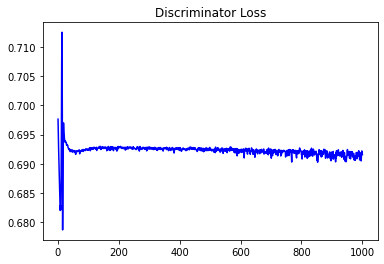

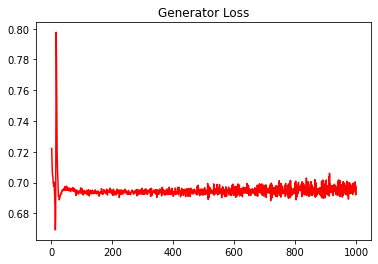

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.162956797363158


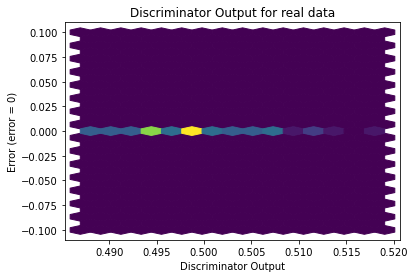

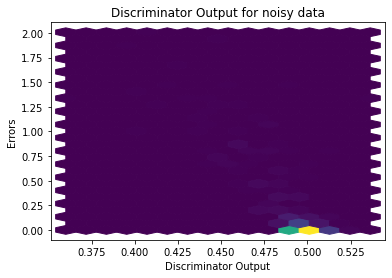

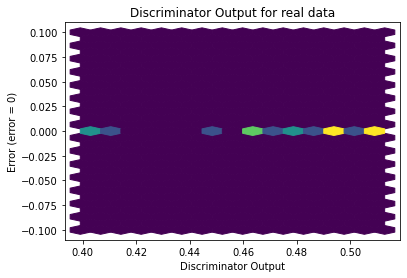

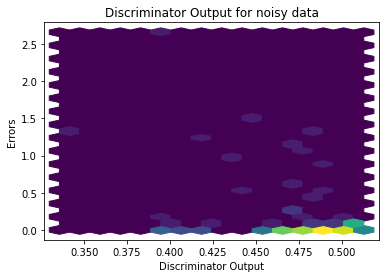

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


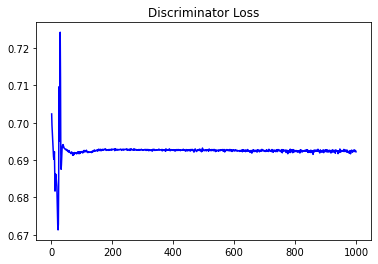

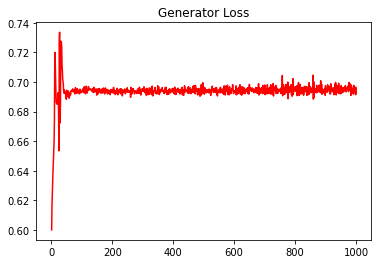

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.14649892600465125


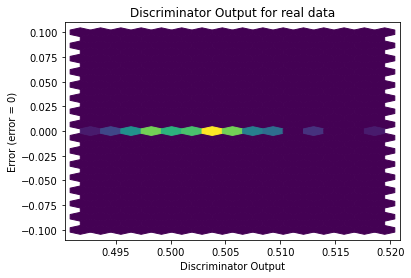

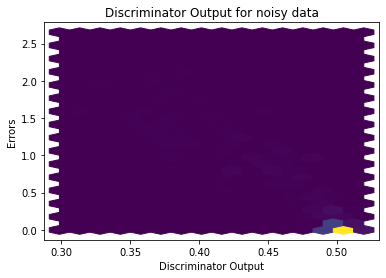

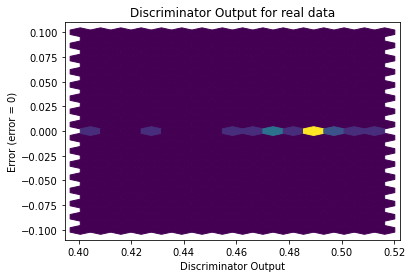

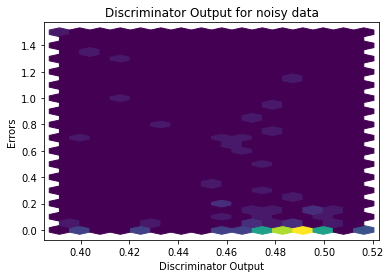

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6517]], requires_grad=True)
